# 20 M Movies Ratings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

### Carga de Datasets

In [2]:
df_movies = pd.read_csv("../datasets/Movies 20M/ml-20m/movies.csv")
df_movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [3]:
df_movies.shape

(27278, 3)

In [4]:
df_gscores = pd.read_csv("../datasets/Movies 20M/ml-20m/genome-scores.csv", sep=",")
df_gscores.head(3)

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775


In [5]:
df_gscores.shape

(11709768, 3)

In [6]:
df_gtags = pd.read_csv("../datasets/Movies 20M/ml-20m/genome-tags.csv", sep=",")
df_gtags.head(3)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century


In [7]:
df_gtags.shape

(1128, 2)

In [8]:
df_ratings = pd.read_csv("../datasets/Movies 20M/ml-20m/ratings.csv", sep=",")
df_ratings.head(3)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819


In [9]:
df_ratings.shape

(20000263, 4)

### Revisión inicial de información

In [10]:
df_movies["genres"].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Action|Adventure|Animation|Fantasy|Horror',
       'Animation|Children|Comedy|Fantasy|Sci-Fi',
       'Animation|Children|Comedy|Western'], dtype=object)

In [11]:
genres = np.array(df_movies["genres"].unique())
genres, genres.size

(array(['Adventure|Animation|Children|Comedy|Fantasy',
        'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
        'Action|Adventure|Animation|Fantasy|Horror',
        'Animation|Children|Comedy|Fantasy|Sci-Fi',
        'Animation|Children|Comedy|Western'], dtype=object), 1342)

In [12]:
# Bucle para separar géneros de perliculas por el str "|"
genres_temp = []

for i in range(len(genres)):
    tem=genres[i].split("|")
    genres_temp.append(tem)

genres_temp = np.array(genres_temp)
genres_temp

array([list(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']),
       list(['Adventure', 'Children', 'Fantasy']),
       list(['Comedy', 'Romance']), ...,
       list(['Action', 'Adventure', 'Animation', 'Fantasy', 'Horror']),
       list(['Animation', 'Children', 'Comedy', 'Fantasy', 'Sci-Fi']),
       list(['Animation', 'Children', 'Comedy', 'Western'])], dtype=object)

In [13]:
# Bucle para convertir de "list" a "array" con los géneros ya separados
genres_tem = []

for i in range(len(genres_temp)):
    values = np.array(genres_temp[i])
    genres_tem.append(values)

genres_tem[0]

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
      dtype='<U9')

In [14]:
# Bucle para listar los géneros separados y hacerlos unicos
genres_unique = []

for i in range(1341):
    v1 = genres_tem[i]
    #print(v1)
    for j in range(v1.size):
        v3 =v1[j].tolist()
        #print(v3)
        genres_unique.append(v3)

genres_unique=pd.DataFrame(genres_unique)
target_genres = genres_unique[0].unique()
target_genres = target_genres[[0,1,7,9,12,15]]
target_genres

array(['Adventure', 'Animation', 'Action', 'Thriller', 'Sci-Fi', 'War'],
      dtype=object)

In [15]:
All_genres = genres_unique[0].unique()
All_genres = All_genres.tolist()

In [16]:
# Crea las "N" columnas rellenandolas con ceros según los géneros de películas

df_movies = pd.read_csv("../datasets/Movies 20M/ml-20m/movies.csv")

for i in range(0,len(All_genres)):
    df_movies[All_genres[i]] = 0

In [17]:
df_movies[:3]

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# separa por el caracter "|" los generos de cada celda de la columna "genres"
temp=[]

for i in range(int(df_movies.shape[0])):
    v1=(np.array(df_movies["genres"])[i]).split("|")
    temp.append(v1)

temp=np.array(temp)
temp.size

27278

In [19]:
# Elimina el array de arrays dejando cada celda con su género correspondiente ya separado
temp2 = []

for i in range(len(temp)):
    values = np.array(temp[i])
    temp2.append(values)

temp2[0]

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
      dtype='<U9')

In [ ]:
serch_genres=['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 
              'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 
              'Western', 'Film-Noir', '(no genres listed)']

In [ ]:
# Asigna valor "1" a cada categoría de peliculas en su correspondiente columna de género

serch_genres=All_genres
for i in range(0,len(df_movies["genres"])):
    #print(temp2[i])
    for j in range(0,temp2[i].size):
        for z in range(0,len(serch_genres)):
            #print(serch_genres[z])
            #print(temp2[i][j])
            for c in range(0,len(df_movies.columns.values)):
                if temp2[i][j]==serch_genres[z]==df_movies.columns.values[c]:
                    df_movies[df_movies.columns.values[c]][i] = 1
        

In [20]:
# Guarda en un nuevo archivo las variables dummy generadas para cada género
df_movies.to_csv("../datasets/Movies 20M/ml-20m/movies_genres.csv")

#### Revisión de archivo con variables dummy por género ya generadas

In [21]:
df_movies = pd.read_csv("../datasets/Movies 20M/ml-20m/movies_genres.csv")
df_movies = df_movies.drop(["Unnamed: 0"], axis = 1)
df_movies.head(3)

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


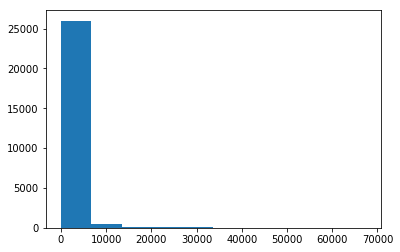

In [22]:
# Revisión de peliculas con más valoraciónes
plt.hist(df_ratings.groupby(["movieId"])["movieId"].count())
plt.show()

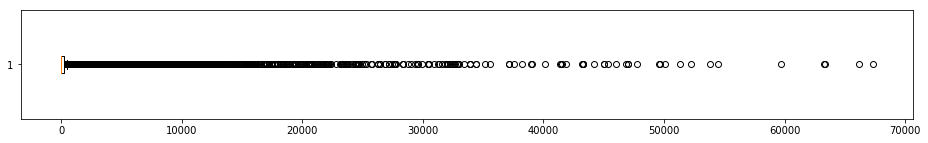

            movieId
count  26744.000000
mean     747.841123
std     3085.818268
min        1.000000
25%        3.000000
50%       18.000000
75%      205.000000
max    67310.000000


In [23]:
best_views=pd.DataFrame(df_ratings.groupby(["movieId"])["movieId"].count())
plt.figure(figsize=(16,2))
plt.boxplot(best_views["movieId"], vert=False)
plt.show()
print(best_views.describe())

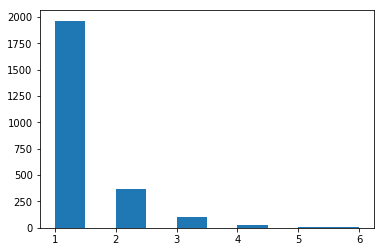

(26744, 1) (3159, 1)


In [24]:
# Se define la cantidad de valoraciónes "M" como parametro para filtrar la base de datos
M=1000

top_best_views = best_views[(best_views["movieId"]>M)]
top_best_views.columns = ["rank_movie_ID"]
plt.hist(top_best_views.groupby(["rank_movie_ID"])["rank_movie_ID"].count())
plt.show()
print(best_views.shape, top_best_views.shape)

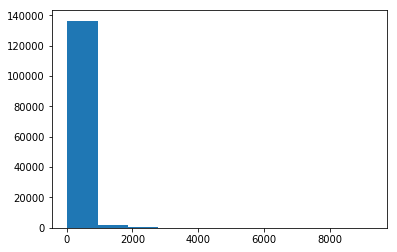

In [25]:
# Revisión de usuarios con más valoraciónes
plt.hist(df_ratings.groupby(["userId"])["userId"].count())

plt.show()

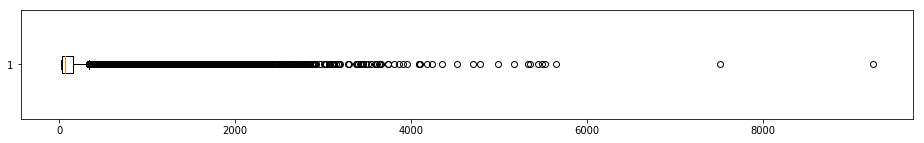

              userId
count  138493.000000
mean      144.413530
std       230.267257
min        20.000000
25%        35.000000
50%        68.000000
75%       155.000000
max      9254.000000


In [26]:
best_users=pd.DataFrame(df_ratings.groupby(["userId"])["userId"].count())
plt.figure(figsize=(16,2))
plt.boxplot(best_users["userId"], vert=False)
plt.show()
print(best_users.describe())

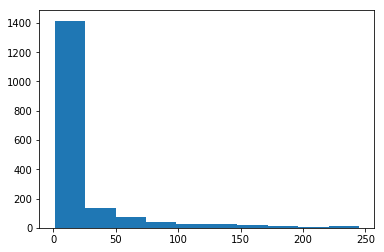

(138493, 1) (35571, 1)


In [27]:
# Se define la cantidad de usuarios "U" como parametro para filtrar la base de datos
U=150

top_best_users = best_users[(best_users["userId"]>U)]
top_best_users.columns = ["rank_user_ID"]
plt.hist(top_best_users.groupby(["rank_user_ID"])["rank_user_ID"].count())
plt.show()
print(best_users.shape, top_best_users.shape)

In [28]:
# Reducimos nuestra base de datos "df_ratings_top" en función de la cantidad representativa de "top_best_users"

df_ratings_top = pd.merge(left = df_ratings, right = top_best_users, how = "inner", 
                          right_on = "userId", left_on = "userId")
df_ratings.shape, df_ratings_top.shape 

((20000263, 4), (13980569, 5))

In [29]:
# Reducimos nuestra base de datos "df_ratings_top" en función de la cantidad representativa de "top_best_views"

df_ratings_top = pd.merge(left = df_ratings_top, right = top_best_views, how = "inner", 
                          right_on = "movieId", left_on = "movieId")
df_ratings.shape, df_ratings_top.shape 

((20000263, 4), (12054933, 6))

In [30]:
m0 = df_ratings.movieId.unique().shape[0]
m1 = df_ratings_top.movieId.unique().shape[0]
u0 = df_ratings.userId.unique().shape[0]
u1 = df_ratings_top.userId.unique().shape[0]

print("Con los filtros anteriores se redujo el N° de peliculas únicas desde", m0,"a", 
      m1, ", es decir, ", m0-m1  , "menos")
print("\n")
print("Con los filtros anteriores se redujo el N° usuarios únicos desde", u0,"a", 
      u1, ", es decir, ", u0-u1  , "menos")  

Con los filtros anteriores se redujo el N° de peliculas únicas desde 26744 a 3159 , es decir,  23585 menos


Con los filtros anteriores se redujo el N° usuarios únicos desde 138493 a 35571 , es decir,  102922 menos


In [31]:
# Crearemos los campos totalizados con el "Ranking" promedio y "Q_Ranging" total de valoraciones por película

# Se crea el ranking promedio de calificaciónes 

rank_movies_top_tg = df_ratings_top.groupby(["movieId"])
rank_movies_top_tg = rank_movies_top_tg.aggregate( 
    {
        "rating": np.mean,
    }
)

# Se crea base de datos "df_ratings_top_tg" con el "movieId" de películas unicas
df_ratings_top_tg = df_ratings_top[["movieId"]]
df_ratings_top_tg = df_ratings_top_tg.drop_duplicates(subset=(["movieId"]))
print(df_ratings_top_tg.shape)

# Agrega "rating" promedio a la base de datos principal
df_ratings_top_tg = pd.merge(left = df_ratings_top_tg, right = rank_movies_top_tg, how = "left", 
                        right_on = "movieId", left_on = "movieId")

# Agrega "Q_Ratings" a la base de datos principal
top_best_views.columns = ["Q_Ratings"]
df_ratings_top_tg = pd.merge(left = df_ratings_top_tg, right = top_best_views, how = "left", 
                          right_on = "movieId", left_on = "movieId")

print(df_ratings_top.shape, df_ratings_top_tg.shape)

(3159, 1)
(12054933, 6) (3159, 3)


In [32]:
# Creamos una base de datos principal "df_movies_tg" e incorporamos los campos "Ranking", "Q_Ranging"
df_movies_tg = pd.merge(left = df_ratings_top_tg, right = df_movies, how = "inner", 
                        right_on = "movieId", left_on = "movieId")

print(df_movies.shape, df_ratings_top_tg.shape, df_movies_tg.shape)

# Bucle para agregar el campo de "Age" a la base de datos principal
dates = []
for d in range(0,df_movies_tg["title"].shape[0]):
    date = int(df_movies_tg["title"][d][len(df_movies_tg["title"][d])-5:len(df_movies_tg["title"][d])-1])
    dates.append(date)
dates = pd.DataFrame(dates)
dates.columns = ["Age"]

df_movies_tg = pd.concat([df_movies_tg, dates], axis = 1)

# Estiliza nombres de columnas y ordena su posición en el DF
df_movies_tg.columns = ['MovieId', 'Rating', 'Q_Ratings', 'Title', 'All_Genres', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX',
       'Documentary', 'War', 'Musical', 'Western', 'Film-Noir',
       '(no genres listed)', 'Age']
cols = ['MovieId', 'Title', 'Age', 'Q_Ratings', 'Rating', 'All_Genres', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX',
       'Documentary', 'War', 'Musical', 'Western', 'Film-Noir',
       '(no genres listed)']
df_movies_tg = df_movies_tg[cols]

# Guarda "df_movies_tg en un archivo excel
df_movies_tg.to_excel("../datasets/Movies 20M/Reports/df_movies_tg.xlsx")

df_movies_tg[:2]

(27278, 23) (3159, 3) (3159, 25)


,MovieId,Title,Age,Q_Ratings,Rating,All_Genres,Adventure,Animation,Children,Comedy,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,2,Jumanji (1995),1995,22243,3.056825,Adventure|Children|Fantasy,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29,"City of Lost Children, The (Cité des enfants p...",1995,8520,3.926361,Adventure|Drama|Fantasy|Mystery|Sci-Fi,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [33]:
def selector(Genres='All', Azim=230, Elev=20):
    
    from mpl_toolkits.mplot3d import Axes3D 
    select = df_movies_tg
    select["All"] = 1
    select = select[(select[Genres]==1)]
    #select[(select["Age"].values==2014)]
 
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111, projection="3d", azim=Azim, elev=Elev) # 111 = dimenciones del gráfico
    ax.scatter(xs=select["Rating"], ys=select["Age"], zs=select["Q_Ratings"], color="b", linewidths=0.001)
    plt.xlabel("Rating")
    plt.ylabel("Age")
    plt.title("Relación entre Valoraciónes y Cantidad de Valoraciones por Año")

    figure, axs  = plt.subplots(3,2, sharey = False, sharex = False, figsize=(14,15))
    select.plot(kind="hist", x="Age", y="Rating", ax = axs[0][0])
    select.plot(kind="scatter", x="Rating", y="Q_Ratings", ax = axs[0][1])
    select.plot(kind="hist", x="Age", y="Q_Ratings", ax = axs[1][0])
    select.plot(kind="scatter", x="Rating", y="Age", ax = axs[1][1])
    select.plot(kind="hist", x="Q_Ratings", y="Age", ax = axs[2][0])
    select.plot(kind="scatter", x="Q_Ratings", y="Age", ax = axs[2][1])
    plt.show()

    best_views=pd.DataFrame(select.groupby(["Rating"])["Rating"].count())
    plt.figure(figsize=(15,2))
    print("Box Plot de las Valoraciones por Género")
    plt.boxplot(select["Rating"], vert=False)
    plt.show()
    #print("Estadisticos principales de las Valoraciones")
    #print(select.Rating.describe())
    select=select[["Title","Q_Ratings","Rating"]]
    print("Top 5 Movie Ratings")
    print(select.sort_values(["Rating","Q_Ratings"])[::-1][:6])

In [34]:
from ipywidgets import interact
interact(selector, Genres = ['All', 'Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi',
       'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir'],  
        Azim=[200,215,230,245,260], Elev=[10, 20, 40, 60, 90] 
       )

interactive(children=(Dropdown(description='Genres', options=('All', 'Adventure', 'Animation', 'Children', 'Co…

<function __main__.selector(Genres='All', Azim=230, Elev=20)>

#### Segmentación del dataset "df_movies_tg" por género para generar modelo de K-NearestNeighbors

In [35]:
# Especificamos las columnas que utilizaremos para nuestro análisis en el modelo de K-NearestNeighbors

desired_columns_k = ["movieId", "title", "genres", "Adventure", "Animation", "Action", "Thriller", "Sci-Fi", "Horror"]

In [36]:
# Creamos un subset de "df_ratings_tg" para utilizarlo posteriormente en el modelo de K-NearestNeighbors

subset = df_movies[desired_columns_k]

subset1 = subset[(subset["Horror"]==1)]
print(df_movies.shape, subset1.shape)

df_ratings_tg = pd.merge(left = df_ratings_top, right = subset1, how = "inner", 
                         right_on = "movieId", left_on = "movieId")
print(df_ratings.shape , df_ratings_top.shape, df_ratings_tg.shape)
print("Variación en N° usuarios", df_ratings.userId.unique().shape[0],"a", df_ratings_tg.userId.unique().shape[0])
print("Variación en N° películas:",df_ratings.movieId.unique().shape[0],"a",df_ratings_tg.movieId.unique().shape[0])

df_ratings_tg[:2]

(27278, 23) (2611, 9)
(20000263, 4) (12054933, 6) (923282, 14)
Variación en N° usuarios 138493 a 35470
Variación en N° películas: 26744 a 285


,userId,movieId,rating,timestamp,rank_user_ID,rank_movie_ID,title,genres,Adventure,Animation,Action,Thriller,Sci-Fi,Horror
0,1,253,4.0,1112484940,175,27568,Interview with the Vampire: The Vampire Chroni...,Drama|Horror,0,0,0,0,0,1
1,11,253,4.5,1230858996,504,27568,Interview with the Vampire: The Vampire Chroni...,Drama|Horror,0,0,0,0,0,1


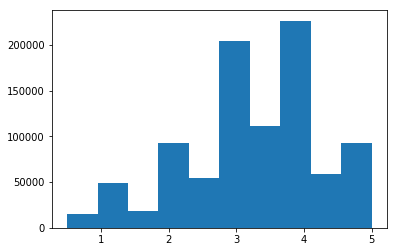

In [37]:
plt.hist(df_ratings_tg.rating)
plt.show()

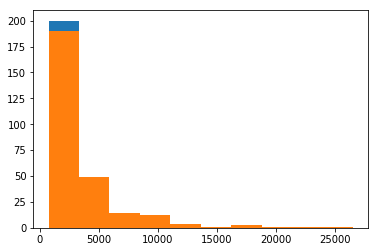

In [38]:
plt.hist(df_ratings_tg.groupby(["movieId"])["movieId"].count()), 
plt.hist(df_ratings_tg.groupby(["rank_movie_ID"])["rank_movie_ID"].count()),
plt.show()

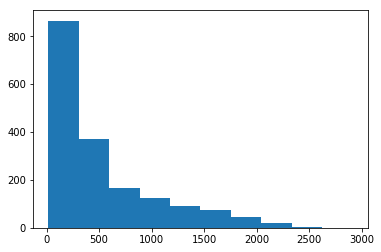

In [39]:
plt.hist(df_ratings_tg.groupby(["rank_user_ID"])["rank_user_ID"].count()) 
plt.show()

In [40]:
# Por limitaciones en memoria RAM del ordenador dividiremos la base de datos aleatorizamente en 2 grupos

df_ratings_t1 = df_ratings_tg[["userId", "movieId", "rating", "timestamp"]]
df_ratings_t0, df_ratings_t1 = train_test_split(df_ratings_t1, test_size = 0.3, random_state=2)
#df_ratings_t0, df_ratings_t1 = train_test_split(df_ratings_t1, test_size = 0.0002, random_state=2) # FOR MODEL TEST
print(df_ratings_t0.shape , df_ratings_t1.shape)
print("Usuarios únicos: ", df_ratings_t1.userId.unique().shape[0])
print("Películas únicas: ", df_ratings_t1.movieId.unique().shape[0])

(646297, 4) (276985, 4)
Usuarios únicos:  33816
Películas únicas:  285


In [41]:
# Para evitar el error de "index" en el modelo al generar la matriz de entre "userId" y "movieId", creé un 
# diccionario adicional con un nuevo "index" de 1 a N para los nuevos campos "userId_DC" y "movieId_DC"

userId_DC=list(zip(df_ratings_t1.userId.unique(),range(1,df_ratings_t1.userId.unique().shape[0]+1)))
movieId_DC=list(zip(df_ratings_t1.movieId.unique(),range(1,df_ratings_t1.movieId.unique().shape[0]+1)))
userId_DC = pd.DataFrame(userId_DC)
userId_DC.columns = ["userId", "userId_DC"]
movieId_DC = pd.DataFrame(movieId_DC)
movieId_DC.columns = ["movieId", "movieId_DC"]


# Permite unir los nuevos campos de "userId_DC" y "movieId_DC" a la base de datos de ratings "df_ratings_t2"
df_ratings_t2 = pd.merge(left = df_ratings_t1, right = userId_DC, how = "left", 
                         right_on = "userId", left_on = "userId")

df_ratings_t2 = pd.merge(left = df_ratings_t2, right = movieId_DC, how = "left", 
                         right_on = "movieId", left_on = "movieId")
print(df_ratings_t2.shape)
print(df_ratings_t2[(df_ratings_t2["userId_DC"]==1049)][:3])


# Permite seleccionar solo los campos que utilizaremos
df_ratings_t2 = df_ratings_t2[["userId_DC", "movieId_DC", "rating", "timestamp"]]
df_ratings_t2.head(3)

(276985, 6)
       userId  movieId  rating   timestamp  userId_DC  movieId_DC
1086    50808     3499     4.0  1418071041       1049         109
38783   50808     6754     4.0  1418500543       1049         123
73469   50808     2722     3.0  1418071767       1049         100


,userId_DC,movieId_DC,rating,timestamp
0,1,1,5.0,956710974
1,2,2,3.5,1304968963
2,3,3,3.0,979592796


## Creación de Modelo

### Filtro colaborativo basado en KNN (para items)

In [42]:
n_users = df_ratings_t2.userId_DC.unique().shape[0]
n_items = df_ratings_t2.movieId_DC.unique().shape[0]+1

n_users, n_items

(33816, 286)

In [43]:
views = np.zeros((n_users, n_items))
views.shape

(33816, 286)

In [44]:
for row in df_ratings_t2.itertuples(): 
    views[row[1]-1, row[2]-1] = row[3]

print(views)
print(type(views), views.shape)


sparsity = float(len(views.nonzero()[0]))
sparsity /= (views.shape[0]*views.shape[1])
sparsity *= 100
print("Coeficiente de sparsieda: {:4.2f}%".format(sparsity)) 

[[5.  0.  3.  ... 0.  0.  0. ]
 [2.5 3.5 0.  ... 0.  0.  0. ]
 [5.  0.  3.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [5.  0.  0.  ... 0.  0.  0. ]]
<class 'numpy.ndarray'> (33816, 286)
Coeficiente de sparsieda: 2.86%


In [45]:
k = 11
#neighbors_mov = NearestNeighbors(k, "cosine")
neighbors_mov = NearestNeighbors(k,metric='minkowski', p=2)
neighbors_mov.fit(views.T)
top_views_k_distances, top_views_k_items = neighbors_mov.kneighbors(views.T, return_distance=True)

In [46]:
top_10_mov = pd.DataFrame(top_views_k_items)
top_10_mov = top_10_mov.drop([0], axis = 0)
top_10_mov.head(3)

,0,1,2,3,4,5,6,7,8,9,10
1,1,285,150,224,54,271,261,149,240,76,138
2,2,285,150,261,54,184,260,280,149,224,271
3,3,285,280,150,224,54,76,184,271,249,261


In [47]:
top_10_dis = pd.DataFrame(top_views_k_distances)
top_10_dis.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,374.726233,375.024999,375.128978,375.161299,375.218603,375.268237,375.301878,375.313203,375.344175,375.497004
1,0.0,148.774998,150.014999,150.308017,150.646938,150.707498,150.806996,151.027315,151.278716,151.461216,151.475246
2,0.0,143.574023,145.651982,146.175408,146.196785,146.277134,146.489761,146.502560,146.575066,146.575919,146.670549


### Evaluación del Modelo

In [70]:
def get_mse(preds, actuals):
    if preds.shape[0]!=actuals.shape[0]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten() 
    actuals = actuals[actuals.nonzero()].flatten() 
    return mean_squared_error(preds,actuals)

In [71]:
views.shape , top_views_k_distances.shape , top_views_k_items.shape

((33816, 286), (286, 11), (286, 11))

In [72]:
views = views.T

In [73]:
preds = np.zeros(views.shape) 
for i in range(views.shape[0]):
    if(i%200==0):   
        print("iter "+str(i))
    den = 1
    if (np.abs(top_views_k_distances[i]).sum(axis=0)>0):
        den = np.abs(top_views_k_distances[i]).sum(axis=0)
    preds[i, :] = top_views_k_distances[i].dot(views[top_views_k_items][i])/np.array([den]).T

iter 0
iter 200


In [74]:
preds.shape , views.shape

((286, 33816), (286, 33816))

In [265]:
print("El MSE de training es:",get_mse(preds, views))

El MSE de training es: 11.765732242612586


In [ ]:
#Test 1
# El MSE de training es: 12.80470482841799 con "minkowski", size = (1299, 671)
# El MSE de training es: 12.80470482841799 con "cosine", size = (1299, 671)

#Test 2
# El MSE de training es: 12.749093509921858 con "minkowski", size = (10773, 1563)
# El MSE de training es: 12.749093509921858 con "cosine", size = (10773, 1563)

#Test 3
#El MSE de training es: 11.765597311868888 con "minkowski", size = (33816, 286)


## Resumen y Presentación de Información

In [48]:
movieId_DC.shape, df_ratings_tg.shape

((285, 2), (923282, 14))

In [49]:
# Se agrega un nuevo ID llamado "movieId_DC" a la base de datos principal para poder cruzarlo con los K-neighbors

movies_k = pd.merge(left = movieId_DC, right = df_ratings_tg, how = "left", 
                    right_on = "movieId", left_on = "movieId")

In [50]:
movies_k.shape

(923282, 15)

In [51]:
movies_k[:3]

,movieId,movieId_DC,userId,rating,timestamp,rank_user_ID,rank_movie_ID,title,genres,Adventure,Animation,Action,Thriller,Sci-Fi,Horror
0,593,1,1,3.5,1112484661,175,63299,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0,0,0,1,0,1
1,593,1,3,5.0,944918215,187,63299,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0,0,0,1,0,1
2,593,1,11,5.0,1230858809,504,63299,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,0,0,0,1,0,1


In [52]:
# Se crea el ranking promedio de calificaciónes 

rank_movies_k = movies_k.groupby(["movieId_DC"])
rank_movies_k = rank_movies_k.aggregate( 
    {
        "rating": np.mean,
    }
)

In [53]:
# Se agrega el ranking promedio de calificaciónes al diccionario de películas "dic_movies_k"

dic_movies_k = movies_k[["movieId", "movieId_DC", "title"]]
print(dic_movies_k.shape)
dic_movies_k=dic_movies_k.drop_duplicates(subset=(["movieId", "movieId_DC", "title"]))
print(dic_movies_k.shape)
dic_movies_k = pd.merge(left = dic_movies_k, right = rank_movies_k, how = "left", 
                        right_on = "movieId_DC", left_on = "movieId_DC")
print(dic_movies_k.shape)

(923282, 3)
(285, 3)
(285, 4)


In [54]:
# Bucle para cambiar el "movieId_DC" por el "title" correspondiente

for n in range(1, int(top_10_mov.shape[0]+1)):
    for m in range(0, int(top_10_mov.shape[1])):
        for p in range(0, int(dic_movies_k.shape[0])):
            if top_10_mov[m][n]==dic_movies_k["movieId_DC"][p]:
                top_10_mov[m][n] = dic_movies_k["title"][p]

/home/pablo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/pablo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
# Bucle para asignar el nombre correcto a cada columna a la matriz de K-neighbors

names = []
for t in range(int(top_10_mov.columns.values.size)):
    temp = "Top "+str(top_10_mov.columns[t])
    names.append(temp)
    
temp = np.array(names)
temp[0] = "Top_M"
top_10_mov.columns = temp
top_10_mov[:2]

,Top_M,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
1,"Silence of the Lambs, The (1991)",Dracula 2000 (2000),Pet Sematary II (1992),Them! (1954),"Return of the Living Dead, The (1985)",Firestarter (1984),Wishmaster (1997),Grindhouse (2007),Thirteen Ghosts (a.k.a. Thir13en Ghosts) (2001),"Omen, The (1976)",AVP: Alien vs. Predator (2004)
2,"American Werewolf in London, An (1981)",Dracula 2000 (2000),Pet Sematary II (1992),Wishmaster (1997),"Return of the Living Dead, The (1985)","Nightmare on Elm Street 4: The Dream Master, A...","Hidden, The (1987)",Ichi the Killer (Koroshiya 1) (2001),Grindhouse (2007),Them! (1954),Firestarter (1984)


In [56]:
# Permite agregar la matriz de los K-neighbors a la base de datos principal

subset_k = subset1.drop(["title"], axis = 1)
df_ratings_k = pd.merge(left = dic_movies_k, right = subset_k, how = "left", 
                        right_on = "movieId", left_on = "movieId")
df_movies_k = pd.merge(left = df_ratings_k, right = top_10_mov, how = "left", 
                        right_on = "Top_M", left_on = "title")
df_movies_k[:2]

,movieId,movieId_DC,title,rating,genres,Adventure,Animation,Action,Thriller,Sci-Fi,...,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
0,593,1,"Silence of the Lambs, The (1991)",4.146722,Crime|Horror|Thriller,0,0,0,1,0,...,Dracula 2000 (2000),Pet Sematary II (1992),Them! (1954),"Return of the Living Dead, The (1985)",Firestarter (1984),Wishmaster (1997),Grindhouse (2007),Thirteen Ghosts (a.k.a. Thir13en Ghosts) (2001),"Omen, The (1976)",AVP: Alien vs. Predator (2004)
1,1321,2,"American Werewolf in London, An (1981)",3.587643,Comedy|Horror|Thriller,0,0,0,1,0,...,Dracula 2000 (2000),Pet Sematary II (1992),Wishmaster (1997),"Return of the Living Dead, The (1985)","Nightmare on Elm Street 4: The Dream Master, A...","Hidden, The (1987)",Ichi the Killer (Koroshiya 1) (2001),Grindhouse (2007),Them! (1954),Firestarter (1984)


In [57]:
# Bucle para agregar el campo de "Age" y "Q_Ratings" a la base de datos principal

dates = []
for d in range(0,df_movies_k["title"].shape[0]):
    date = int(df_movies_k["title"][d][len(df_movies_k["title"][d])-5:len(df_movies_k["title"][d])-1])
    dates.append(date)
dates = pd.DataFrame(dates)
dates.columns = ["Age"]
df_movies_k = pd.concat([df_movies_k, dates], axis = 1)

top_best_views.columns = ["Q_Ratings"]
df_movies_k = pd.merge(left = df_movies_k, right = top_best_views, how = "left", 
                          right_on = "movieId", left_on = "movieId")

In [58]:
# Estiliza nombres de columnas y ordena su posición en el DF
df_movies_k.columns = ['Movie_Id', 'Movie_Id_DC', 'Title', 'Rating', 'All_Genres', 'Adventure',
 'Animation', 'Action', 'Thriller', 'Sci-Fi', 'Horror', 'Top_Title', 
 'Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5', 'Top 6', 'Top 7', 'Top 8', 'Top 9','Top 10' , 'Age', 'Q_Ratings']
cols = ['Movie_Id', 'Movie_Id_DC', 'Title', 'Age', 'Q_Ratings', 'Rating', 'All_Genres', 'Adventure',
 'Animation', 'Action', 'Thriller', 'Sci-Fi', 'Horror', 'Top_Title', 
 'Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5', 'Top 6', 'Top 7', 'Top 8', 'Top 9','Top 10']
df_movies_k = df_movies_k[cols]

In [59]:
df_movies_k.tail()[:2]

,Movie_Id,Movie_Id_DC,Title,Age,Q_Ratings,Rating,All_Genres,Adventure,Animation,Action,...,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
280,56801,281,AVPR: Aliens vs. Predator - Requiem (2007),2007,1135,2.371661,Action|Horror|Sci-Fi,0,0,1,...,Dracula 2000 (2000),Pet Sematary II (1992),"Return of the Living Dead, The (1985)",Wishmaster (1997),Them! (1954),Firestarter (1984),Ichi the Killer (Koroshiya 1) (2001),Grindhouse (2007),"Nightmare on Elm Street 4: The Dream Master, A...",Thirteen Ghosts (a.k.a. Thir13en Ghosts) (2001)
281,71379,282,Paranormal Activity (2009),2009,1120,3.111640,Horror|Thriller,0,0,0,...,Dracula 2000 (2000),Pet Sematary II (1992),Wishmaster (1997),"Return of the Living Dead, The (1985)",Them! (1954),Firestarter (1984),Thirteen Ghosts (a.k.a. Thir13en Ghosts) (2001),Grindhouse (2007),"Omen, The (1976)","Nightmare on Elm Street 4: The Dream Master, A..."


In [60]:
df_movies_k.to_excel("../datasets/Movies 20M/Reports/df_movies_k_neighbors (gn1 - gn2).xlsx")

### Union de matrices de recomendación con base de datos principal

In [61]:
## Base de datos principal

df_plotly =pd.read_excel("../datasets/Movies 20M/Reports/df_movies_tg (plotly).xlsx")
df_plotly[:3]

,MovieId,Title,Age,Q_Ratings,Rating,All_Genres,Genres
0,318,"Shawshank Redemption, The (1994)",1994,63366,4.409557,Crime|Drama,Drama
1,858,"Godfather, The (1972)",1972,41355,4.369970,Crime|Drama,Drama
2,50,"Usual Suspects, The (1995)",1995,47006,4.321375,Crime|Mystery|Thriller,Thriller


In [62]:
# Carga de datasets con matrices de recomendación ya generadas

df_plotly_thr_sci =pd.read_excel("../datasets/Movies 20M/Reports/Metric Minkowski/df_movies_k_neighbors_minkowski (Thriller - Sci-Fi).xlsx")
df_plotly_adv_ani_act =pd.read_excel("../datasets/Movies 20M/Reports/Metric Minkowski/df_movies_k_neighbors_minkowski (Adventure - Animation - Action).xlsx")
df_plotly_dra =pd.read_excel("../datasets/Movies 20M/Reports/Metric Minkowski/df_movies_k_neighbors_minkowski (Drama).xlsx")
df_plotly_com =pd.read_excel("../datasets/Movies 20M/Reports/Metric Minkowski/df_movies_k_neighbors_minkowski (Comedy).xlsx")
df_plotly_hor =pd.read_excel("../datasets/Movies 20M/Reports/Metric Minkowski/df_movies_k_neighbors_minkowski (Horror).xlsx")

In [63]:
# Seleccionamos solo los campos que utilizaremos de los datasets con matrices

desired_col_plotly = ['Movie_Id', 'Top_Title', 'Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5', 'Top 6', 'Top 7', 'Top 8', 'Top 9','Top 10' ]
df_plotly_thr_sci = df_plotly_thr_sci[desired_col_plotly]
df_plotly_adv_ani_act = df_plotly_adv_ani_act[desired_col_plotly]
df_plotly_dra = df_plotly_dra[desired_col_plotly]
df_plotly_com = df_plotly_com[desired_col_plotly]
df_plotly_hor = df_plotly_hor[desired_col_plotly]

In [64]:
# Unimos a la base de datos principal la primera matriz de crecomendación y dejamos el resto de la 
 #información ("df_plotly_PEN") para unirlo con la siguiente matriz, y repetimos el proceso con todas las matrices.

df_plotly_MT = pd.merge(left = df_plotly, right = df_plotly_thr_sci, how = "left", 
                         right_on = "Movie_Id", left_on = "MovieId")

In [65]:
df_plotly_MT = df_plotly_MT.drop(["Movie_Id"], axis = 1)
df_plotly_MTF = df_plotly_MT.dropna(axis=0, how='any')
print(df_plotly_MT.shape, df_plotly_MTF.shape)
df_plotly_MTF[:1]

(3159, 18) (1032, 18)


,MovieId,Title,Age,Q_Ratings,Rating,All_Genres,Genres,Top_Title,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
2,50,"Usual Suspects, The (1995)",1995,47006,4.321375,Crime|Mystery|Thriller,Thriller,"Usual Suspects, The (1995)",Surrogates (2009),"Way of the Gun, The (2000)",Some Folks Call It a Sling Blade (1993),Flightplan (2005),Paul (2011),Charlie's Angels: Full Throttle (2003),Barton Fink (1991),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Recruit, The (2003)","Pan's Labyrinth (Laberinto del fauno, El) (2006)"


In [66]:
df_plotly_TEMP=df_plotly_MT.fillna(0)
df_plotly_PEN=df_plotly_TEMP[(df_plotly_TEMP["Top_Title"]==0)]
dup_columns= ['Top_Title', 'Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5', 'Top 6', 'Top 7', 'Top 8', 'Top 9','Top 10']
df_plotly_PEN = df_plotly_PEN.drop(dup_columns, axis = 1)

In [67]:
df_plotly_MT1 = pd.merge(left = df_plotly_PEN, right = df_plotly_adv_ani_act, how = "left", 
                         right_on = "Movie_Id", left_on = "MovieId")
df_plotly_PEN.shape, df_plotly_MT1.shape

((2127, 7), (2127, 19))

In [68]:
df_plotly_MT1 = df_plotly_MT1.drop(["Movie_Id"], axis = 1)
df_plotly_MTD = df_plotly_MT1.dropna(axis=0, how='any')
print(df_plotly_MTD.shape)
df_plotly_MTD[:1]

(544, 18)


,MovieId,Title,Age,Q_Ratings,Rating,All_Genres,Genres,Top_Title,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
2,7502,Band of Brothers (2001),2001,4305,4.309682,Action|Drama|War,Action,Band of Brothers (2001),Peter Pan (2003),Metropolis (2001),"Borrowers, The (1997)","Ghost and the Darkness, The (1996)",Sahara (2005),End of Days (1999),Around the World in 80 Days (1956),Stardust (2007),Futurama: Bender's Big Score (2007),Atlantis: The Lost Empire (2001)


In [69]:
df_plotly_TEMP=df_plotly_MT1.fillna(0)
df_plotly_PEN=df_plotly_TEMP[(df_plotly_TEMP["Top_Title"]==0)]
dup_columns= ['Top_Title', 'Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5', 'Top 6', 'Top 7', 'Top 8', 'Top 9','Top 10']
df_plotly_PEN = df_plotly_PEN.drop(dup_columns, axis = 1)

In [70]:
df_plotly_MT2 = pd.merge(left = df_plotly_PEN, right = df_plotly_dra, how = "left", 
                         right_on = "Movie_Id", left_on = "MovieId")
df_plotly_PEN.shape, df_plotly_MT2.shape

((1583, 7), (1583, 19))

In [71]:
df_plotly_MT2 = df_plotly_MT2.drop(["Movie_Id"], axis = 1)
df_plotly_MTD1 = df_plotly_MT2.dropna(axis=0, how='any')
print(df_plotly_MTD1.shape)
df_plotly_MTD1[:1]

(914, 18)


,MovieId,Title,Age,Q_Ratings,Rating,All_Genres,Genres,Top_Title,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
0,318,"Shawshank Redemption, The (1994)",1994,63366,4.409557,Crime|Drama,Drama,"Shawshank Redemption, The (1994)",Beyond Rangoon (1995),"Lake House, The (2006)",K-19: The Widowmaker (2002),12 Years a Slave (2013),Rope (1948),Spider (2002),"Apartment, The (1960)",Mermaids (1990),Waking Life (2001),Under the Tuscan Sun (2003)


In [72]:
df_plotly_TEMP=df_plotly_MT2.fillna(0)
df_plotly_PEN=df_plotly_TEMP[(df_plotly_TEMP["Top_Title"]==0)]
dup_columns= ['Top_Title', 'Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5', 'Top 6', 'Top 7', 'Top 8', 'Top 9','Top 10']
df_plotly_PEN = df_plotly_PEN.drop(dup_columns, axis = 1)

In [73]:
df_plotly_MT3 = pd.merge(left = df_plotly_PEN, right = df_plotly_com, how = "left", 
                         right_on = "Movie_Id", left_on = "MovieId")
df_plotly_PEN.shape, df_plotly_MT3.shape

((669, 7), (669, 19))

In [74]:
df_plotly_MT3 = df_plotly_MT3.drop(["Movie_Id"], axis = 1)
df_plotly_MTD2 = df_plotly_MT3.dropna(axis=0, how='any') 
print(df_plotly_MTD2.shape)
df_plotly_MTD2[:1]

(551, 18)


,MovieId,Title,Age,Q_Ratings,Rating,All_Genres,Genres,Top_Title,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
0,750,Dr. Strangelove or: How I Learned to Stop Worr...,1964,23220,4.239462,Comedy|War,Comedy,Dr. Strangelove or: How I Learned to Stop Worr...,Blank Check (1994),Cabin Boy (1994),Kung Pow: Enter the Fist (2002),"Last Boy Scout, The (1991)",Pecker (1998),"Apple Dumpling Gang, The (1975)",Porco Rosso (Crimson Pig) (Kurenai no buta) (1...,Paper Moon (1973),Innerspace (1987),"Flintstones in Viva Rock Vegas, The (2000)"


In [75]:
df_plotly_TEMP=df_plotly_MT3.fillna(0)
df_plotly_PEN=df_plotly_TEMP[(df_plotly_TEMP["Top_Title"]==0)]
dup_columns= ['Top_Title', 'Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5', 'Top 6', 'Top 7', 'Top 8', 'Top 9','Top 10']
df_plotly_PEN = df_plotly_PEN.drop(dup_columns, axis = 1)

In [76]:
df_plotly_MTD3 = pd.merge(left = df_plotly_PEN, right = df_plotly_hor, how = "left", 
                         right_on = "Movie_Id", left_on = "MovieId")
df_plotly_MTD3 = df_plotly_MTD3.drop(["Movie_Id"], axis = 1)
print(df_plotly_PEN.shape, df_plotly_MTD3.shape)
df_plotly_MTD3[:1]

(118, 7) (118, 18)


,MovieId,Title,Age,Q_Ratings,Rating,All_Genres,Genres,Top_Title,Top 1,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7,Top 8,Top 9,Top 10
0,913,"Maltese Falcon, The (1941)",1941,12144,4.184282,Film-Noir|Mystery,Mystery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Revisamos que el total concuerde con la dimensión de nuestra base de datos principal:

df_plotly_MTF.shape[0] + df_plotly_MTD.shape[0] + df_plotly_MTD1.shape[0]+ df_plotly_MTD2.shape[0] + df_plotly_MTD3.shape[0]

3159

In [78]:
# Validamos que todos los sub datasets generados tengan el formato correcto:

df_plotly_MTF.shape, df_plotly_MTD.shape, df_plotly_MTD1.shape, df_plotly_MTD2.shape,  df_plotly_MTD3.shape

((1032, 18), (544, 18), (914, 18), (551, 18), (118, 18))

In [79]:
df_plotly_MTF_EXP = pd.concat([df_plotly_MTF, df_plotly_MTD, df_plotly_MTD1, df_plotly_MTD2, df_plotly_MTD3], axis = 0)
df_plotly_MTF_EXP.shape[0]

3159

In [80]:
# Exportamos nuestra base de datos final en formato "csv" (ojo que el formato "xlsx" exporta los datos con errores)

df_plotly_MTF_EXP.to_csv("../datasets/Movies 20M/Reports/df_plotly_MTF_EXPORT.csv")